### Prompt Chaining

Prompt chaining is a technique in natural language processing where multiple prompts are sequenced together througha  complex task or reasoning process. Instead of relying on a single prompt to achieve a desired outcome, prompt chaining breaks the task into smaller, manageable steps, with each step building on the previous one. This approach can improve accuracy, coherenece, and control when working with large language models. 

In [1]:
import os
import dotenv
from langchain_openai import ChatOpenAI

dotenv.load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)


In [11]:
from typing_extensions import TypedDict
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing import Annotated, Literal
from langgraph.graph.message import add_messages

class State(TypedDict):
    topic: str
    story: str
    improved_story: str
    final_story: str

def generate_story(state: State) -> str:
    msg = llm.invoke("Write a one sentence story premise about " + state["topic"])
    return {"story": msg.content}

def check_conflict(state: State) -> Literal["Fail", "Pass"]:
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

def improve_story(state: State) -> str:
    msg = llm.invoke("Enhance this storey premise with vivid details " + state["story"])
    return {"improved_story": msg.content}

def polish_story(state: State) -> str:
    msg = llm.invoke("Add an unexpected twist to this story premise " + state["improved_story"])
    return {"final_story": msg.content}

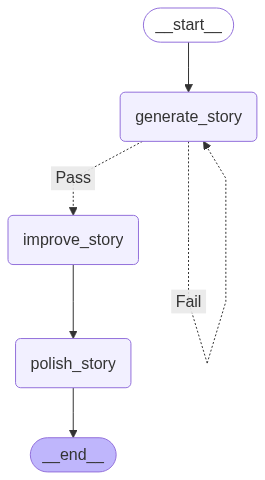

In [12]:
graph_builder = StateGraph(State)
graph_builder.add_node("generate_story", generate_story)
graph_builder.add_node("improve_story", improve_story)
graph_builder.add_node("polish_story", polish_story)

graph_builder.add_edge(START, "generate_story")
graph_builder.add_conditional_edges("generate_story", check_conflict, {
    "Pass": "improve_story",
    "Fail": "generate_story"
})
graph_builder.add_edge("improve_story", "polish_story")
graph_builder.add_edge("polish_story", END)


graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
## Run the graph

state = {"topic": "Agentic AI systems"}
result = graph.invoke(state)
print(result)

TypeError: can only concatenate str (not "set") to str